In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense , Dropout , LSTM
from keras.models import Sequential

In [2]:
start = '2011-01-01'
end = '2022-02-01'

df = data.DataReader('AAPL','yahoo',start,end)
df.head()

TypeError: string indices must be integers, not 'str'

In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-26,164.389999,157.820007,163.500000,159.690002,108275300.0,159.486801
2022-01-27,163.839996,158.279999,162.449997,159.220001,121954600.0,159.017410
2022-01-28,170.350006,162.800003,165.710007,170.330002,179935700.0,170.113266
2022-01-31,175.000000,169.509995,170.160004,174.779999,115541600.0,174.557602
2022-02-01,174.839996,172.309998,174.009995,174.610001,86213900.0,174.387817


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-12-31,11.552857,11.475357,11.533929,11.520000,193508000.0,9.864279
1,2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.078651
2,2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.131251
3,2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.214128
4,2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.205871


In [5]:
df = df.drop(['Date','Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume
0,11.552857,11.475357,11.533929,11.520000,193508000.0
1,11.795000,11.601429,11.630000,11.770357,445138400.0
2,11.875000,11.719643,11.872857,11.831786,309080800.0
3,11.940714,11.767857,11.769643,11.928571,255519600.0
4,11.973214,11.889286,11.954286,11.918929,300428800.0


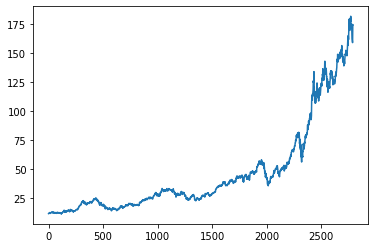

In [6]:
plt.plot(df.Close)

In [7]:
df

,High,Low,Open,Close,Volume
0,11.552857,11.475357,11.533929,11.520000,193508000.0
1,11.795000,11.601429,11.630000,11.770357,445138400.0
2,11.875000,11.719643,11.872857,11.831786,309080800.0
3,11.940714,11.767857,11.769643,11.928571,255519600.0
4,11.973214,11.889286,11.954286,11.918929,300428800.0
...,...,...,...,...,...
2786,164.389999,157.820007,163.500000,159.690002,108275300.0
2787,163.839996,158.279999,162.449997,159.220001,121954600.0
2788,170.350006,162.800003,165.710007,170.330002,179935700.0
2789,175.000000,169.509995,170.160004,174.779999,115541600.0


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2786    158.1554
2787    158.2046
2788    158.3410
2789    158.5377
2790    158.7431
Name: Close, Length: 2791, dtype: float64

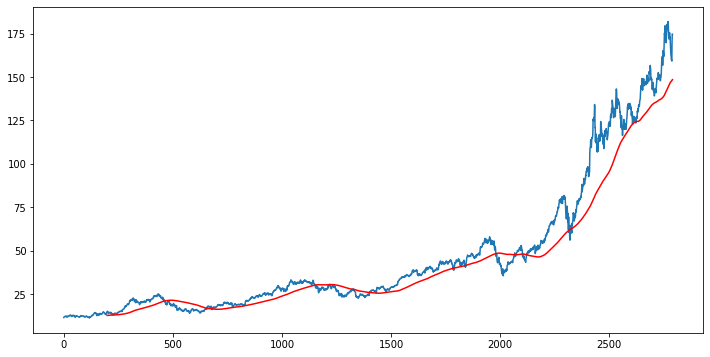

In [14]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [24]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2786    147.80170
2787    147.93765
2788    148.11680
2789    148.31990
2790    148.51875
Name: Close, Length: 2791, dtype: float64

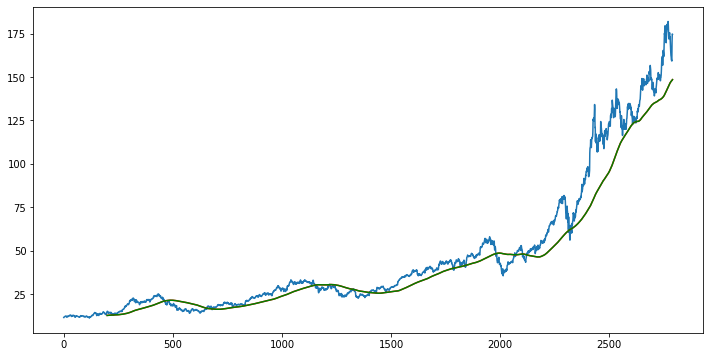

In [30]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [31]:
df.shape

(2791, 5)

In [35]:
#split data into train and test

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame( df[ 'Close' ][ int( len(df)*0.70) : int(len(df))  ] )

print(data_training.shape)
print(data_testing.shape)


(1953, 1)
(838, 1)


In [36]:
data_training.head()

,Close
0,11.520000
1,11.770357
2,11.831786
3,11.928571
4,11.918929


In [37]:
data_testing.head()

,Close
1953,56.997501
1954,56.072498
1955,55.942501
1956,56.717499
1957,54.090000


In [39]:
scaler = MinMaxScaler(feature_range=(0,1))

In [40]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00553023],
       [0.01088475],
       [0.01219857],
       ...,
       [0.97428135],
       [0.98508211],
       [1.        ]])

In [42]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])

x_train , y_train = np.array(x_train) , np.array(y_train)

In [44]:
x_train.shape

(1853, 100, 1)

In [45]:
#ML Model

model = Sequential()
model.add(LSTM(units= 50, activation= 'relu', return_sequences= True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units= 60, activation= 'relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units= 80, activation= 'relu', return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units= 120, activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [47]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train,y_train, epochs=50)

Epoch 1/50
58/58 [==============================] - 23s 248ms/step - loss: 0.0327
Epoch 2/50
58/58 [==============================] - 14s 239ms/step - loss: 0.0061
Epoch 3/50
58/58 [==============================] - 14s 238ms/step - loss: 0.0046
Epoch 4/50
58/58 [==============================] - 14s 234ms/step - loss: 0.0046
Epoch 5/50
58/58 [==============================] - 14s 235ms/step - loss: 0.0044
Epoch 6/50
58/58 [==============================] - 14s 237ms/step - loss: 0.0044
Epoch 7/50
58/58 [==============================] - 14s 235ms/step - loss: 0.0039
Epoch 8/50
58/58 [==============================] - 14s 235ms/step - loss: 0.0042
Epoch 9/50
58/58 [==============================] - 14s 238ms/step - loss: 0.0033
Epoch 10/50
58/58 [==============================] - 14s 235ms/step - loss: 0.0033
Epoch 11/50
58/58 [==============================] - 14s 238ms/step - loss: 0.0031
Epoch 12/50
58/58 [==============================] - 13s 224ms/step - loss: 0.0031
Epoch 13/50
5

In [48]:
model.save('keras_model.h5')

In [49]:
data_testing.head()

,Close
1953,56.997501
1954,56.072498
1955,55.942501
1956,56.717499
1957,54.090000


In [50]:
data_training.tail()

,Close
1948,56.237499
1949,56.435001
1950,56.814999
1951,57.320000
1952,58.017502


In [51]:
past_100_days = data_training.tail(100)

In [53]:
final_df = past_100_days.append(data_testing, ignore_index = True)

<ipython-input-53-1e7e7f089a7f>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [54]:
final_df.head()

,Close
0,47.037498
1,46.610001
2,47.044998
3,46.747501
4,46.577499


In [55]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0784501 ],
       [0.07553128],
       [0.07850131],
       [0.07647009],
       [0.07530937],
       [0.07756252],
       [0.07676027],
       [0.07880857],
       [0.0784501 ],
       [0.07918409],
       [0.07802337],
       [0.07734062],
       [0.07626525],
       [0.08201759],
       [0.08473159],
       [0.08725783],
       [0.08840146],
       [0.08751388],
       [0.08450968],
       [0.08370743],
       [0.0854997 ],
       [0.08280276],
       [0.08297346],
       [0.07962788],
       [0.07945721],
       [0.07425109],
       [0.07563369],
       [0.07385851],
       [0.07293675],
       [0.06824272],
       [0.07210035],
       [0.0716395 ],
       [0.07392677],
       [0.07326107],
       [0.07679439],
       [0.07122983],
       [0.07375607],
       [0.07814287],
       [0.08259794],
       [0.08220535],
       [0.07798925],
       [0.08336605],
       [0.08387813],
       [0.08316122],
       [0.08408295],
       [0.08229068],
       [0.08481694],
       [0.084

In [56]:
input_data.shape

(938, 1)

In [57]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [58]:
x_test , y_test = np.array(x_test) , np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(838, 100, 1)
(838,)


In [59]:
#Make Predictions

y_predicted  = model.predict(x_test)

In [60]:
y_predicted.shape

(838, 1)

In [61]:
y_test

array([0.14645388, 0.14013825, 0.13925067, 0.14454211, 0.12660237,
       0.12334215, 0.13641717, 0.1283093 , 0.13648544, 0.13484681,
       0.12602203, 0.13163779, 0.13392506, 0.13747546, 0.12443458,
       0.13247419, 0.12649996, 0.11956987, 0.1213792 , 0.13086968,
       0.13660494, 0.1114449 , 0.10139113, 0.10511224, 0.115661  ,
       0.11316891, 0.10630708, 0.08872578, 0.08541435, 0.07614578,
       0.08401469, 0.08763335, 0.07454126, 0.05938379, 0.05904241,
       0.05137833, 0.05535546, 0.05470684, 0.06614321, 0.06377059,
       0.06211488, 0.07276608, 0.0588888 , 0.05552616, 0.04489204,
       0.04678673, 0.04513101, 0.04593327, 0.04909106, 0.03975419,
       0.03712555, 0.0407613 , 0.03191943, 0.02498933, 0.0145771 ,
       0.00792012, 0.02556968, 0.02382861, 0.02396517, 0.02654264,
       0.02684987, 0.        , 0.010361  , 0.00979771, 0.01461125,
       0.01898096, 0.01981736, 0.01723989, 0.01333105, 0.01857132,
       0.02176325, 0.02333362, 0.02497227, 0.0189639 , 0.02002

In [62]:
y_predicted

array([[0.19443528],
       [0.19537514],
       [0.19644816],
       [0.1975128 ],
       [0.19849347],
       [0.19922607],
       [0.19956872],
       [0.19952697],
       [0.19911015],
       [0.1984181 ],
       [0.19756672],
       [0.1965974 ],
       [0.19557941],
       [0.19459671],
       [0.19374497],
       [0.1929937 ],
       [0.19235153],
       [0.19178346],
       [0.1912063 ],
       [0.19056815],
       [0.18992068],
       [0.18937585],
       [0.18884331],
       [0.18816721],
       [0.1872456 ],
       [0.18610872],
       [0.18482235],
       [0.1834198 ],
       [0.18183589],
       [0.18001845],
       [0.1779174 ],
       [0.17555888],
       [0.17303447],
       [0.1703957 ],
       [0.16763511],
       [0.16475536],
       [0.16175653],
       [0.15867998],
       [0.15558738],
       [0.15261538],
       [0.14988196],
       [0.14746177],
       [0.14546488],
       [0.14387614],
       [0.1426177 ],
       [0.14155024],
       [0.14056545],
       [0.139

In [63]:
scaler.scale_

array([0.00682769])

In [64]:
scale_factor = 1/0.00682769
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


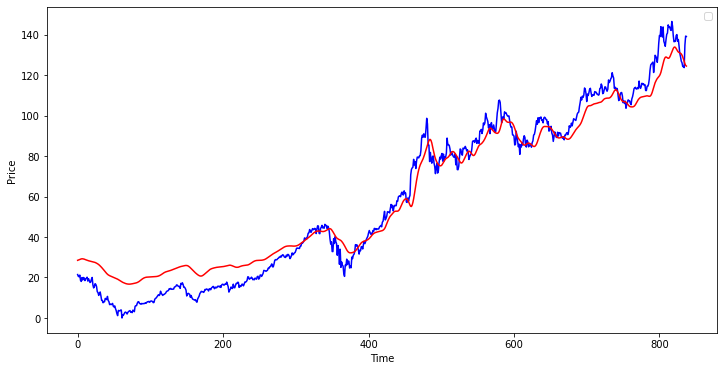

In [69]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b')
plt.plot(y_predicted, 'r')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()